In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
print(tf.__version__)

2.8.2


In [4]:
keras.__version__

'2.8.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
print(X_train_full.shape)

print(X_train_full.dtype)

print(y_train_full)

(60000, 28, 28)
uint8
[9 0 0 ... 3 0 5]


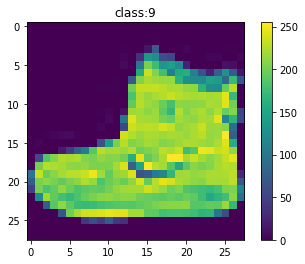

In [7]:
plt.figure()

plt.imshow(X_train_full[0])

plt.colorbar()

plt.grid(False)

plt.title('class:{}'.format(y_train_full[0]))

plt.show()

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255

In [9]:
X_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

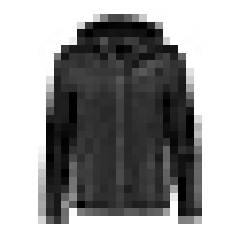

In [10]:
plt.imshow(X_train[0], cmap="binary") #cmap- color map

plt.axis('off')

plt.show()

In [11]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))

model.add(keras.layers.Dense(300, activation="relu"))

model.add(keras.layers.Dense(100, activation="relu"))

model.add(keras.layers.Dense(10, activation="softmax")
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=30,

validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7255 - accuracy: 0.7622 - val_loss: 0.4952 - val_accuracy: 0.8390
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4859 - accuracy: 0.8310 - val_loss: 0.4509 - val_accuracy: 0.8424
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4394 - accuracy: 0.8477 - val_loss: 0.4150 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4123 - accuracy: 0.8561 - val_loss: 0.4061 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3926 - accuracy: 0.8627 - val_loss: 0.3969 - val_accuracy: 0.8616
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3767 - accuracy: 0.8676 - val_loss: 0.3768 - val_accuracy: 0.8700
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3637 - accuracy: 0.8720 - val_loss: 0.3833 - val_accuracy

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3262 - accuracy: 0.8872


[0.3262389004230499, 0.8871999979019165]

In [16]:
X_new = X_test[:3]

y_proba = model.predict(X_new)

y_proba.round(2)



array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [17]:
y_pred = model.predict(X_new)
#np.argmax(preds)
y_pred

array([[1.51101131e-06, 2.36469333e-08, 8.73149475e-07, 1.18075525e-06,
        8.89949774e-07, 4.72286111e-03, 1.02249601e-06, 1.32796979e-02,
        5.39046778e-05, 9.81938004e-01],
       [1.52667548e-04, 4.54404372e-08, 9.97294009e-01, 1.13657165e-07,
        2.50702561e-03, 1.86462790e-10, 4.54370384e-05, 1.87099616e-08,
        7.17756848e-07, 9.56259960e-10],
       [5.22130540e-06, 9.99992847e-01, 2.47865710e-08, 1.81664745e-06,
        9.01464787e-08, 1.28148160e-11, 1.46930388e-08, 3.62598923e-10,
        2.46757570e-09, 9.98938237e-13]], dtype=float32)